# Data Science Introduction Course

**Dataset:** [Titanic Competition - Kaggle](https://www.kaggle.com/c/titanic/overview)

**Idea:** Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**Available data:**
* `data/kaggle_data.csv`: Contains the details of a subset of the passengers on board and will reveal whether they survived or not. Which is our target label.
* `data/kaggle_test.csv`: Contains similar information but does not disclose the target label for each passenger. It’s your job to predict these outcomes.

We will split our dataset into a seperate training and test set, to evaluate our model locally, but we can also predict the `kaggle_test.csv`-file and submit [here](https://www.kaggle.com/c/titanic/submit) to see our actual accuracy.

<br>

by Henrik Høiness

### Quick introduction to DataFrames (5 min)

Think of it as a matrix or a spreadsheet in Excel, which we can store information on a row-column basis. 

In [13]:
import pandas as pd

# Example on dataframes
example_df = pd.DataFrame([["Henrik", 23, "Oslo"], ["William", 24, "Ulsteinvik"]], columns=["Name", "Age", "Hometown"])

example_df

,Name,Age,Hometown
0,Henrik,23,Oslo
1,William,24,Ulsteinvik


In [14]:
# Get Name-column as a Series (list of column values with index)
example_df["Name"]

0     Henrik
1    William
Name: Name, dtype: object

In [15]:
# Get a dataframe containing Name and Age columns
example_df[["Name", "Age"]]

,Name,Age
0,Henrik,23
1,William,24


In [16]:
# Get first row of dataframe
example_df.loc[0]

Name        Henrik
Age             23
Hometown      Oslo
Name: 0, dtype: object

In [17]:
# Get persons older than 23
example_df[example_df["Age"] > 23]

,Name,Age,Hometown
1,William,24,Ulsteinvik


In [18]:
# Comment: example_df["Age"] > 23 will create a boolean list, which says which indices to include in result
old = example_df["Age"] > 23
old

0    False
1     True
Name: Age, dtype: bool

In [19]:
# Add column with year of birth
from datetime import datetime

year_today = datetime.now().year
example_df["Birthyear"] = year_today - example_df["Age"]

example_df

,Name,Age,Hometown,Birthyear
0,Henrik,23,Oslo,1997
1,William,24,Ulsteinvik,1996


## 1. Loading data

**Task:** Load `data/kaggle_data.csv` into dataframe using pandas and display first five rows (`.head()`). Also print length of our dataset.

In [20]:
import pandas as pd
import numpy as np
np.random.seed(42) # Setting random seed in order to have reproducability

# Resource: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

# Load data into dataframe using pandas
df = pd.read_csv("data/kaggle_data.csv")

print(f"Length of dataset {len(df)}")

# Display first 5 rows
df.head()

Length of dataset 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. EDA - Exploratory Data Analysis

What does each feature represent?

| Variable      | Definition                                 | Key                                                |
|---------------|--------------------------------------------|----------------------------------------------------|
| `PassengerId` | Unique passenger identifier                |                                                    |
| `Survived`    | Survival                                   | 0 = No, 1 = Yes                                    |
| `Pclass`      | Ticket class                               | 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower) |
| `Name`        | Name                                       | Name includes title, e.g. Miss. or Dr.             |
| `Sex`         | Sex                                        |                                                    |
| `Age`         | Age in years                               |                                                    |
| `SibSp`       | # of siblings and spouses aboard           |                                                    |
| `Parch`       | # of parents and children aboard           |                                                    |
| `Ticket`      | Ticket number                              |                                                    |
| `Fare`        | Passenger fare                             |                                                    |
| `Cabin`       | Cabin number                               |                                                    |
| `Embarked`    | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton     |

**Task:** Discuss with your neighbour about which features you think could be useful when predicting whether or not a passenger survived.

#### How many survived in our dataset?
**Task:** Find out how many survived, and plot the distribution.

*Feature: Survived*

* The `Survived` feature is our target label, and is what we want to predict
* Values $\in$ $\{0, 1\}$

*Tip: Count survivors with `.value_counts()`. Plot using `sns.barplot(...)`.*

#### Walkthrough:

0    0.616162
1    0.383838
Name: Survived, dtype: float64

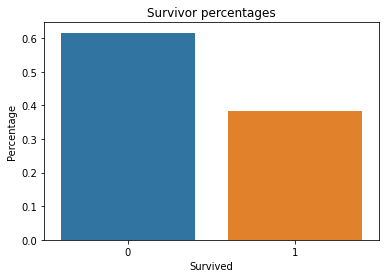

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate survival percentage
survived_perc = df["Survived"].value_counts() / len(df)

# Plot count of values in survival-column
sns.barplot(x=survived_perc.index, y=survived_perc.values)
plt.title("Survivor percentages")
plt.ylabel("Percentage")
plt.xlabel("Survived")

survived_perc

#### What's the distribution for the three ticket classes?

**Task:** Plot the ticket class counts, and percentage of survivors for each ticket class.

*Feature: Pclass*

* The `Pclass` represent ticket class, and represents the price classes for the tickets.
* Could be used as a proxy for wealth?
* Values $\in$ $\{1, 2, 3\}$

*Tip: Use `.groupby(...)` when investigating survivor rates per ticket class.*

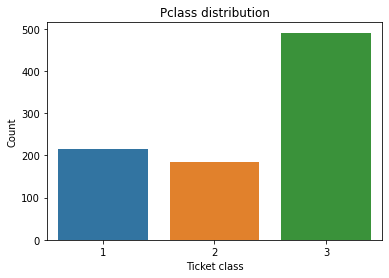

In [22]:
# Plot a single plot with counts for each ticket class

pclass_count = df["Pclass"].value_counts()

sns.barplot(x=pclass_count.index, y=pclass_count.values)
plt.title("Pclass distribution")
plt.ylabel("Count")
plt.xlabel("Ticket class");

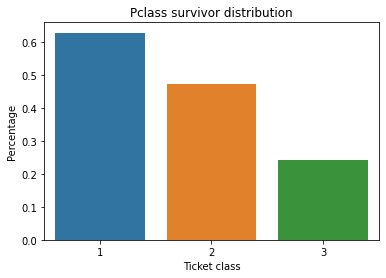

In [23]:
# Plot a single plot with distribution of survivors for each ticket class

pclass_survived = df[["Pclass", "Survived"]].groupby("Pclass").mean()

sns.barplot(x=pclass_survived.index, y=pclass_survived.values[:, 0])
plt.title("Pclass survivor distribution")
plt.ylabel("Percentage")
plt.xlabel("Ticket class");

What do we see?

#### What's the distribution for sex?

**Task:** Plot the sex percentage, and percentage of survivors for male and female.

*Feature: Sex*

* Who is more likely to survive? A man or a woman? 
* Values $\in$ $\{male,\ female\}$

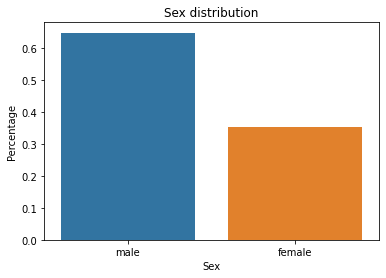

In [24]:
# Plot a single plot with percentages of dataset population for each sex
sex_percentage = df["Sex"].value_counts() / len(df)

sns.barplot(x=sex_percentage.index, y=sex_percentage.values)
plt.title("Sex distribution")
plt.ylabel("Percentage")
plt.xlabel("Sex");

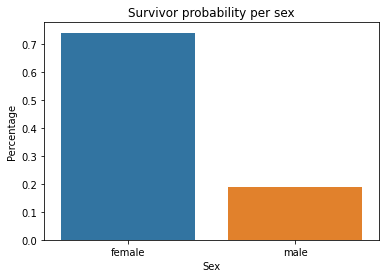

In [25]:
# Plot survivor percentage of dataset population for each sex
# Tip: Check out df[[desired columns]] and .groupby(...)
sex_survivor_percentage = df[["Sex", "Survived"]].groupby("Sex").mean()

sns.barplot(x=sex_survivor_percentage.index, y=sex_survivor_percentage.values[:, 0])
plt.title("Survivor probability per sex")
plt.ylabel("Percentage")
plt.xlabel("Sex");

#### What's the distribution for age?

**Task:** Plot a distribution plot (`.histplot(column, kde=True)`) for the age. How many rows are missing `Age` values?


*Tip: Use `.isna()` and `.sum()` to count NaN-values.*

*Feature: Age*

* Who is more likely to survive? A child, an adult or an elder?
* Values $\in$ $\mathbb{Z}^{+}$

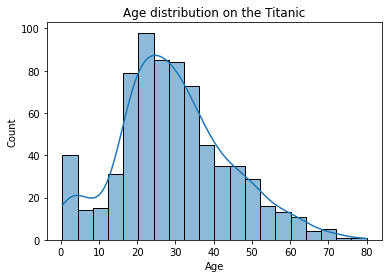

In [27]:
# Plot a distribution plot for the Age column
sns.histplot(df['Age'], kde=True)
plt.title('Age distribution on the Titanic');

In [28]:
# Display number of missing values for our Age-column
df['Age'].isna().sum()

177

#### What's the distribution for Sibling and Spouse count?

**Task:** Plot a bar plot for the counts of the sibling/spouse values.

*Feature: SibSp*

* Who is more likely to survive? Someone travelling alone or someone with siblings or children?
* Values $\in$ $\{0, 1, 2, 3, 4, 5, 6, 7, 8\}$

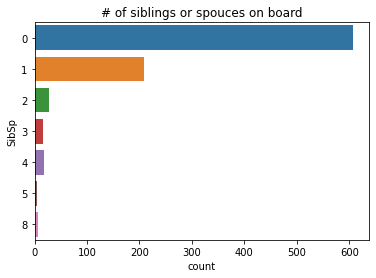

In [16]:
# Plot the count of each possible value in the SibSp-column. 
# Tip: Use .countplot(...)

sns.countplot(y='SibSp', data=df)
plt.title('# of siblings or spouces on board');

#### What's the distribution for parents and children count?

**Task:** Plot a count plot for the counts of the parents/children values.

*Feature: Parch*

* Who is more likely to survive? Someone travelling alone or someone with their parents or children?
* Values $\in$ $\{0, 1, 2, 3, 4, 5, 6\}$

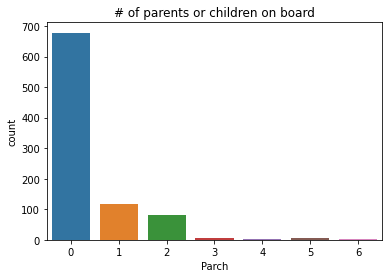

In [17]:
# Plot the count of each possible value in the Parch-column
sns.countplot(x='Parch', data=df)
plt.title('# of parents or children on board');

**Feature: Ticket**

Ticket is a string variable showing the ticket number.
Ticket number should not be that important for survival rate. Could be possible to extract ticket class, but as we already have this. We skip this feature.

In [18]:
df["Ticket"].iloc[0]

'A/5 21171'

#### What's the distribution for ticket price?

**Task:** Plot a distribution plot for the ticket prices. Also, look at description (`.describe()`) for `Fare`-column.

*Feature: Fare*

* Expecting this to have similar impact on survival rate as ticket class.
* Values $\in$ $\mathbb{Z}^{+}$

In [29]:
# Display description/summary of Fare-column (1 line of code)
df.describe()["Fare"]

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

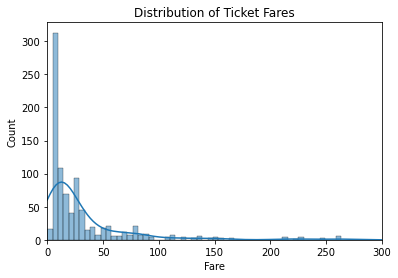

In [20]:
# Plot distribution plot of Fare-values (.histplot(column, kde=True))
sns.histplot(df['Fare'], kde=True)
plt.title("Distribution of Ticket Fares");
plt.xlim(0, 300);

**Feature: Cabin**

`Cabin` contains the cabin number for our passengers. This value is unfortunately missing for more than $2/3$ of our data. Therefore we skip this feature.

**Task: Check how many rows are missing for this feature (`.isna().sum()`)**

In [21]:
# Display number of missing rows
df["Cabin"].isna().sum()

687

#### What's the distribution for place of embarkment? 

**Task:** Plot the counts (`.countplot(x=..., data=...)`) for all places of embarkment, and another plot of survivor rates for each place of embarkment.

*Feature: Embarked*
* Initial thoughts: The city of where a passenger departed should not effect the survival rate. 
* Values $\in$ $\{S, C, Q, NaN\}$
    * S: Southampton
    * C: Cherbourg
    * Q: Queenstown
    
*Tips: Use `.groupby(...)` for survival rates.*

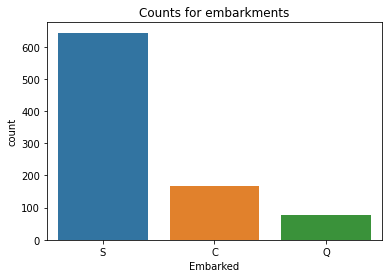

In [22]:
# Plot counts for each place of embarkment
sns.countplot(x="Embarked", data=df)
plt.title("Counts for embarkments");

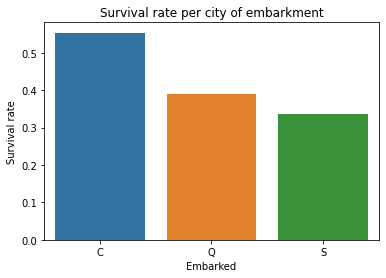

In [23]:
# Plot survival rates for each place of embarkment
embarked_survival = df[["Embarked", "Survived"]].groupby("Embarked").mean()
sns.barplot(x=embarked_survival.index, y=embarked_survival.values[:, 0])
plt.title("Survival rate per city of embarkment");
plt.ylabel("Survival rate");

## 3. Feature Engineering

1. Which features do we want to use.
2. Change features so they are able to be inputted to our models
3. Fix missing values

In [24]:
# Display which columns are missing values, and how many (.isnull().sum())

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Column: Title

In [25]:
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

As we can see, people are having titles in their names. These say alot about a passengers position in the society.

Description of all titles we have present:

| Mr           | Adult Male                         |
|--------------|------------------------------------|
| Miss         | An unmarried (usually young) woman |
| Mrs          | A married woman                    |
| Master       | A boy                              |
| Dr           | A Doctor title                     |
| Rev          | Reverent                           |
| Col          | Military title                     |
| Mlle         | Mademoiselle                       |
| Major        | Military title                     |
| Ms           | Mrs                                |
| Don          | Mr in Spanish                      |
| Dona         | Mrs in Spanish                     |
| Lady         | Woman with high social status      |
| Capt         | Military title                     |
| Jonkheer     | Low nobility rank                  |
| Mme          | Madam                              |
| the Countess | Nobility title                     |
| Sir          | Titled knights                     |

**Task: Create a column called `Title` with the titles in the passanger's names.**

*Tip: Check out `.apply(lambda s: ....)`, and split (`.split(seperator)`) on the necessary seperators that you find necessary (see first five rows from above)*

In [26]:
# Create a titles variable with the titles in the Name-column and assign it to a Title-column in our dataframe
titles = df["Name"].apply(lambda s: s.split(", ")[1].split(".")[0])
df["Title"] = titles

titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

**Task:** 

1. Join the rare titles {`Dr`, `Rev`, `Major`, `Col`, `Jonkheer`, `the Countess`, `Capt`, `Lady`, `Sir`} to a common label `High title`
2. Replace the following:
    * `Don` $\rightarrow$ `Mr`
    * `Dona` and `Mme` $\rightarrow$ `Mrs`
    * `Mlle` and `Ms` $\rightarrow$ `Miss`
3. Verify that we have replaced our titles correctly, by displaying all unique values with their respective counts in our `Title`-column (`.value_counts()`).
    
*Tip: Check out `.replace('target', 'replace')` or `.replace(['target1', 'target2'], 'replace')`*.

In [27]:
# Join and replace titles as specified above

df["Title"] = df["Title"].replace(["Dr", "Rev", "Major", "Col", "Jonkheer", "the Countess", "Capt", "Lady", "Sir"], "High title")
df["Title"] = df["Title"].replace("Don", "Mr")
df["Title"] = df["Title"].replace(["Dona", "Mme"], "Mrs")
df["Title"] = df["Title"].replace(["Mlle", "Ms"], "Miss")

df["Title"].value_counts()

Mr            518
Miss          185
Mrs           126
Master         40
High title     22
Name: Title, dtype: int64

### Column: Age

As we saw above, the `Age` column have $177$ missing values. How should we replace them?

*Idea: Replace age based on average age within their title. Should be a good approximate for their age.*

**Task: Find the average age for each title.**

*Tip: See `.groupby(...)` and `.mean()`*

In [28]:
# Create a dataframe containing the average age for each title

avg_age_title = df[["Title", "Age"]].groupby("Title").mean()
avg_age_title

,Age
Title,
High title,45.809524
Master,4.574167
Miss,21.845638
Mr,32.387218
Mrs,35.788991


In [29]:
# Assign age for missing values, using mean age of titles
# Tip: Use .loc[] and .isna() and &-operator in .loc
# E.g.: df.loc[(df[column].isna()) & (df[column] == desired_value), column] = avg_value_title.loc[desired_title, column]

df.loc[(df["Age"].isna()) & (df["Title"] == "High title"), "Age"] = avg_age_title.loc["High title", "Age"]
df.loc[(df["Age"].isna()) & (df["Title"] == "Master"), "Age"]     = avg_age_title.loc["Master", "Age"]
df.loc[(df["Age"].isna()) & (df["Title"] == "Miss"), "Age"]       = avg_age_title.loc["Miss", "Age"]
df.loc[(df["Age"].isna()) & (df["Title"] == "Mr"), "Age"]         = avg_age_title.loc["Mr", "Age"]
df.loc[(df["Age"].isna()) & (df["Title"] == "Mrs"), "Age"]        = avg_age_title.loc["Mrs", "Age"]

In [30]:
# Check that all missing values are gone.
df["Age"].isna().sum()

0

### Column: SibSp and Parch

We have two columns representing size of each passenger's family on-board. We will now make a column that specifies whether or not a passenger has a family member on board.

**Task: Create a column `HasFamily` with values 1 = *has family* and 0 = *travelling alone*.**

In [31]:
# Initialize column with zeroes
df["HasFamily"] = 0

# Create a boolean list for passengers that do have family
has_family = (df["SibSp"] + df["Parch"]) > 0

# Fill with 1's for passengers with family, see .loc[]
df.loc[has_family, "HasFamily"] = 1

In [32]:
# Check that our results are as expected, show the head of our dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,HasFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


### Column: Sex

We have a column `Sex` that specifies whether or not a passenger is a *male* or *female*. 
An idea would be to include a value for passengers that are children within this column.

**Task: Assign `child` as value for passengers that are younger than 10 in our `Sex`-column. Then plot average survival rate per unique value in column.**

*Tip: See `.loc[condition, column]` again.*

In [33]:
# Assign child as value for passenger younger than 10
df.loc[df["Age"] <= 10, "Sex"] = "child"

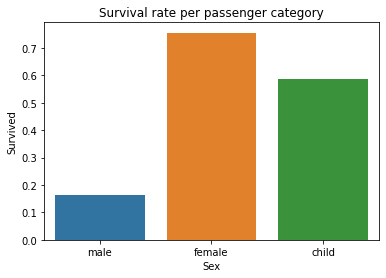

In [34]:
# Plotting avg survival rate
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title("Survival rate per passenger category");

## 4. Feature selection

Which features do we want to feed into our models? 
In what format do we want to input our features?

**Keep:**
1. `Survived` - as it is our target label
2. `Title` - would say much about passenger's status in society
3. `HasFamily` - more likely to survive if not travelling alone
4. `Pclass` - ticket class represents the price classes for the tickets, could be proxy for wealth
5. `Sex` - passenger's sex could be an important factor, as we see in our plot above.

**Remove:**
1. `Name` - remove as we have captured it's important information in `Title`-column
2. `SibSp` and `Parch` - remove as we have a `HasFamily`-column capturing if a passenger is travelling alone.
3. `Ticket` - remove as we assume it does not provide important information about the passenger's survival rate
4. `Cabin`- remove at is has mostly missing values
5. `Fare`- remove as we are using `Pclass` and `Title` to indicate wealth 
6. `Age` - remove as we now have captured whether or not a passenger is a child in the `Sex`-column

In [35]:
# Create a list called usecols containing the column names we want to use in our predictions
usecols = ["Survived", "Title", "HasFamily", "Pclass", "Sex"]

# Extract the columns in our df in a new dataframe called data
# Tip: df[desired_columns]
data = df[usecols]
data.head()

,Survived,Title,HasFamily,Pclass,Sex
0,0,Mr,1,3,male
1,1,Mrs,1,1,female
2,1,Miss,0,3,female
3,1,Mrs,1,1,female
4,0,Mr,0,3,male


### Splitting our data

In order to evaluate our model, we have to seperate our data into a training set and a test set.
The test set should never be used to train or tune the model, but can be used to evaluate a model after fitting.

Use `test_size = 0.2` and `random_state = 42` for the `train_test_split`-method.

In [36]:
from sklearn.model_selection import train_test_split

# Seperate our columns into X (features), y (target labels)
X, y = data.drop("Survived", axis=1), data["Survived"]

# Split our data with a 0.8/0.2 train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 712
Testing set size: 179


In [37]:
# Display the head of our training data
X_train.head()

,Title,HasFamily,Pclass,Sex
331,Mr,0,1,male
733,Mr,0,2,male
382,Mr,0,3,male
704,Mr,1,3,male
813,Miss,1,3,child


#### Data representation

How should we represent our data as we are feeding it into our models?
I present two widely used options:

1. Categorical values should be ordinal, e.g. $\{male,\ female,\ child\} \rightarrow \{0, 1 , 2\}$, or 
2. Categorical values should be one-hot-encoded, e.g. $\{male,\ female,\ child\}$ will be seperated into a binary column for each category, where 1 means that it is true. 

For our first attempt at predicting the surviving passengers we will go with *Option 2.*

*Tips:*
* *Fit and transform on training data (`fit_transform(...)`)*
* *Transform on test data (`transform(...)`)*

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

X_train = encoder.fit_transform(X_train) # Fit encoder and transform training data
X_test = encoder.transform(X_test) # Transform test data

# Make data to arrays
# Tip use .toarray()

X_train, X_test = X_train.toarray(), X_test.toarray()

In [39]:
# Which binary columns have we created for our data?
encoder.get_feature_names(X.columns)

array(['Title_High title', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'HasFamily_0', 'HasFamily_1', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_child', 'Sex_female', 'Sex_male'], dtype=object)

## 5. Machine Learning and Model Prediciton

**Steps:**

1. Understand model
2. Fit model on training data
3. Predict survivors on test data
4. Evaluate model on performance on both training and test data

### Logistic regression

As a difference from linear regression, which is a linear function that predicts values in $\mathbb{R}$, when we use logistic regression our output will always be in $[0, 1]$, which is great when predicting probabilities.

**Short (perhaps too short) introduction to logisitic regression:**

First, the logistic model used to predict probabilities:

$$
\begin{aligned}
f_\hat{\boldsymbol{\theta}} (\textbf{x}) = \sigma(\hat{\boldsymbol{\theta}} \cdot \textbf{x})
\end{aligned}
$$

The difference from linear regression, is that we send our trained weights multiplied with our feature-vector through a sigmoid function $\sigma$, which outputs values in $[0, 1]$. The sigmoid function is defined as 

$$
\sigma(\hat{\boldsymbol{\theta}} \cdot \textbf{x}) = \frac{1}{1 + e^{-\hat{\boldsymbol{\theta}} \cdot \textbf{x}}}
$$

Then, the cross-entropy loss function:

$$
\begin{aligned}
L(\boldsymbol{\theta}, \textbf{X}, \textbf{y}) = \frac{1}{n} \sum_i \left(- y_i \ln \sigma_i - (1 - y_i) \ln (1 - \sigma_i ) \right), \\
\end{aligned}
$$
where $\sigma_i = \sigma(\hat{\boldsymbol{\theta}} \cdot \textbf{x})$

Finally, the gradient of the cross-entropy loss for gradient descent:

$$
\begin{aligned}
\nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta}, \textbf{X}, \textbf{y})
= - \frac{1}{n} \sum_i \left(
    y_i - \sigma_i
\right) \textbf{X}_i \\
\end{aligned}
$$


![image.png](https://i.imgur.com/SZy4W95.png)

**Task:**
1. **Fit a Logistic Regression model on training data**
2. **Predict training data and evaluate accuracy**
3. **Predict test data**
4. **Evaluate model performance**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define model
lr_model = LogisticRegression()

# Fit model
lr_model.fit(X_train, y_train)

# Predict training data
train_preds = lr_model.predict(X_train)

# Output accuracy on training data
train_acc = accuracy_score(y_train, train_preds)
print(f"Accuracy on training data: {train_acc:.4f}")

Accuracy on training data: 0.8202


In [41]:
# Predict test data
test_preds = lr_model.predict(X_test)

# Calculate accuracy on test set
test_acc = accuracy_score(y_test, test_preds)
print(f"Accuracy on test data: {test_acc:.4f}")

Accuracy on test data: 0.7821


### K-nearest neighbours

Another widely used model for prediciton is K-nearest neighbours, which predicts a point based on the average target value for the $k$ nearest neighbours in our feature space. Can also be used for classification tasks where the model chooses the highest represented class amongst the $k$ neighbours.

Since we have $n$ features in our training data, our samples (instance) will represent a point in $\mathbb{R}^{n}$, which is a $n$-dimensional space.

The model will calculate the Euclidian distance between our training samples and the point we are trying to predict, and average the target value of the $k$ closest points.

$$
\text{Euclidian distance} = \sqrt{\sum_{i=1}^{k}(x_i - y_i)^2}
$$

*Example illustration:*
![knnimage](https://www.jeremyjordan.me/content/images/2017/06/Screen-Shot-2017-06-17-at-9.30.39-AM-1.png)

**Task:**
1. **Fit a K-Nearest Neighbour model on training data**
2. **Predict training data and evaluate accuracy**
3. **Predict test data**
4. **Evaluate model performance**

In [42]:
from sklearn.neighbors import KNeighborsClassifier 

# Define model
knn_model = KNeighborsClassifier()

# Fit model
knn_model.fit(X_train, y_train)

# Predict training data
train_preds = knn_model.predict(X_train)

# Output accuracy on training data
train_acc = accuracy_score(y_train, train_preds)
print(f"Accuracy on training data: {train_acc:.4f}")

Accuracy on training data: 0.7907


In [43]:
# Predict test data
test_preds = knn_model.predict(X_test)

# Calculate accuracy on test set
test_acc = accuracy_score(y_test, test_preds)
print(f"Accuracy on test data: {test_acc:.4f}")

Accuracy on test data: 0.7542


### Random Forest

Another famous model architecture that used today are random forest.
Random forests are an ensemble learning method (uses multiple models internally) for classification and regression that construcs multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

**Visualization of a decision tree:**

![DT](https://www.sqlshack.com/wp-content/uploads/2019/09/sample-of-a-decision-tree.png)

And a random forest model consists of a multitude of these trees, in order to make a prediciton.
The decision trees splits on a feature on each node of the tree, which is selected by a information gain metric which are based on impurity by calculating the entropy for each possible split.



**Task:**
1. **Fit a Random Forest model on training data**
2. **Predict training data and evaluate accuracy**
3. **Predict test data**
4. **Evaluate model performance**

In [44]:
from sklearn.ensemble import RandomForestClassifier 

# Define model
rf_model = RandomForestClassifier()

# Fit model
rf_model.fit(X_train, y_train)

# Predict training data
train_preds = rf_model.predict(X_train)

# Output accuracy on training data
train_acc = accuracy_score(y_train, train_preds)
print(f"Accuracy on training data: {train_acc:.4f}")

Accuracy on training data: 0.8216


In [45]:
# Predict test data
test_preds = rf_model.predict(X_test)

# Calculate accuracy on test set
test_acc = accuracy_score(y_test, test_preds)
print(f"Accuracy on test data: {test_acc:.4f}")

Accuracy on test data: 0.7709


## Further work

**Ideas to do at home:**

* Find more interesting features, how do they effect the accuracy of our models
* Tune hyperparameters of the models, e.g. number of trees in Random Forest model or threshold for logistic regression. Remember to create a validation set for this, as we do not evaluate our model on test set for tuning our model.
* Predict the `kaggle_test.csv` file and upload to Kaggle to see your models performance
* Experiment with other models than introduced during course
* Try similar approach on different dataset, e.g. *Boston House Pricing* dataset, see Kaggle.


